<a href="https://colab.research.google.com/github/Anusha5824/Face-Emotion-Detection/blob/main/Facial_Emotion_Detection_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Emotion Recognition**

###Importing Libraries

In [ ]:
import numpy as np
import math
import time

from sklearn.svm import SVC
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### Importing dataset

In [ ]:
import pandas as pd
from google.colab import drive 
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/NNDL/fer2013.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(35887, 3)

In [ ]:
len(df.pixels.iloc[0].split(' ')) == 48*48 #iloc function helps us to select particular cell of the dataset

True

In [ ]:
df.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [ ]:
expression_map = {0:'Anger',
                  1:'Disgust',
                  2:'Fear',
                  3:'Happy',
                  4:'Sad',
                  5:'Surprise',
                  6:'Neutral'}

In [ ]:
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

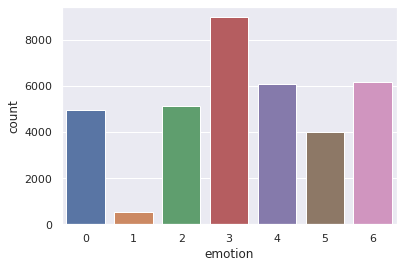

In [ ]:
sn.set_theme(style='darkgrid')
ax = sn.countplot(x='emotion', data=df)

In [ ]:
x_data = df['emotion']
y_data = df['pixels']

In [ ]:
from imblearn.over_sampling import RandomOverSampler 
oversampler = RandomOverSampler(sampling_strategy="auto")

x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape, y_data.shape)

(408408, 1) (408408,)


In [ ]:
x_data = pd.Series(x_data.flatten()) #pd.Series is 1D ndarray with axis labels 
x_data

0         0
1         0
2         2
3         4
4         6
         ..
408403    3
408404    3
408405    3
408406    3
408407    3
Length: 408408, dtype: int64

In [ ]:
y_data.value_counts()

70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92 

### Data Visualization

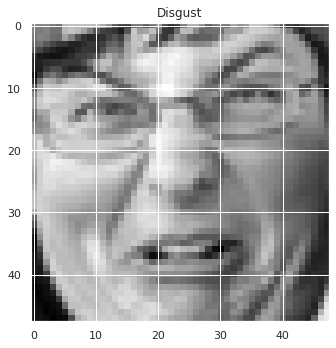

In [ ]:
fig = plt.figure(1,(5,5))
#Expression label
label = 1

img = np.array(df[df.emotion == label].pixels.iloc[0].split(' ')).reshape(48,48).astype('float32')
imgplot = plt.imshow(img, cmap='gray')
plt.title(expression_map[label])
plt.tight_layout()

In [ ]:
np.array(df[df.emotion == label].pixels.iloc[0].split(' ')).dtype

dtype('<U3')

In [ ]:
x_data = np.array(list(x_data.split(' ')), np.float32)
x_data /= 255

AttributeError: ignored

In [ ]:
# converting pixels to 2304 float numpy arrays

X = df.pixels.apply(lambda x: np.array(x.split(' ')).astype('float32'))
X = np.stack(X, axis=0)
Y = np.array(df['emotion'])

## Data Preprocessing

Cascade Object Detection

In [ ]:
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

Face Alignment

In [ ]:
def face_align(gray) :
  sz = gray.shape

  # Creating variable eyes
  # detectMultiscale - Detects objects of different sizes in the input image. 
  # The detected objects are returned as a list of rectangles.Rect(x,y,w,h)
  eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)
  # scaleFactor - Parameter that specifies how much the image size is reduced at each image scale : 1.3
  # minNeighbors - Parameter specifying how many neighbors each candidate rectangle should have to retain it : 5
  if len(eyes) > 1:
    index = 0
    #Creating loop to divide one eye from another
    for (ex, ey, ew, eh) in eyes :
      # For eyes, the position of detected eye are as a rectangle with left up corner (x,y) having w-width, h-height 
      if index == 0 :
        eye1 = (ex, ey, ew, eh)
      elif index == 1:
        eye2 = (ex, ey, ew, eh)
      index += 1
    if eye1[0] < eye2[0] : # the x coordinate of left up corner is less, it is left_eye
      left_eye = eye1
      right_eye = eye2
    else :
      left_eye = eye2
      right_eye = eye1
    
    #Calculating coordinates of central points of the rectangles
    left_eye_center = ((left_eye[0]+left_eye[2])/2 , (left_eye[1]+left_eye[3])/2)
    left_eye_x = left_eye_center[0]
    left_eye_y = left_eye_center[1] 
    right_eye_center = ((right_eye[0]+right_eye[2])/2 , (right_eye[1]+right_eye[3])/2)
    right_eye_x = right_eye_center[0]
    right_eye_y = right_eye_center[1]
    
    delta_x = right_eye_x - left_eye_x
    delta_y = right_eye_y - left_eye_y
    angle = np.arctan(delta_y/delta_x)
    angle = angle * 180/np.pi

    #Extracting height and width from the image shape
    h, w = gray.shape[:2]
    #Calculating a center point of the image
    #Integer division // ensures that we get only whole numbers
    center = (w//2, h//2)
    # This function makes a transformation matrix which will be used for rotation of the image
    M = cv2.getRotationMatrix2D(center, angle, scale=1) 
    # Rotating the image using cv2.warpAffine method
    gray = cv2.warpAffine(gray, M, (w, h))

    #Again detecting the face
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) > 0:
      (x,y,w,h) = faces[0]
      gray = gray[y:y+h, x:x+w]

  cv2.resize(gray, sz) #resizing is scaling of images helps in reducing the no.of pixels and can reduce the time of training of neural network
  return gray

In [ ]:
X_new = []
for j in range(X.shape[0]) :
  px = np.array(X[j]).reshape(48,48)
  px = np.array(px, dtype = 'uint8')
  px_new = face_align(px)
  X_new.append(np.array(px_new).reshape(48*48))
X = np.array(X_new)

## Train and Test split for KNN and SVM

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, shuffle=True, stratify=Y, test_size=0.2, random_state=2)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((28709, 2304), (7178, 2304), (28709,), (7178,))

### PCA to retain 95% variation and reduce dataset size

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float32))
X_valid = scaler.transform(X_valid.astype(np.float32))
#95% of variance
pca = PCA(n_components = 0.95)
pca.fit(X_train)
X_test_p = pca.transform(X_valid)
X_train_p = pca.transform(X_train)
X_train_p = scaler.fit_transform(X_train_p.astype(np.float32))
X_test_p = scaler.transform(X_test_p.astype(np.float32))
X_train_p.shape, X_test_p.shape

((28709, 269), (7178, 269))

### SVM -- Using Linear Kernel

In [ ]:
model = SVC(kernel='linear')
model.fit(X_train_p, y_train)
model.score(X_test_p, y_valid)

### SVM -- Using rbf kernel

In [ ]:
model = SVC(kernel='rbf')
model.fit(X_train_p, y_train)
model.score(X_test_p, y_valid)

0.46140986347171914

### KNN

neighbors = 1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)0.3496795764837002
classifier.score(X_valid, y_valid)

0.406241292839231

In [ ]:
import time
start_time = time.time()
y_pred = classifier.predict(X_valid)
print('Time taken : %s seconds' % (time.time() - start_time))

Time taken : 45.676557779312134 seconds


In [ ]:
cnt = 0
for i in range(X_valid.shape[0]) :
  cnt += y_pred[i] == y_valid[i] 
print("Accuracy", cnt/X_valid.shape[0] *100, '%')


Accuracy 40.6241292839231 %


In [ ]:
knn = KNeighborsClassifier() #using default parameters
knn.fit(X_train, y_train)
knn.score(X_valid, y_valid)

0.34800780161604905

In [ ]:
# Knn with n_neigbors = 3
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)
classifier.score(X_valid, y_valid)

0.3496795764837002

**ML Algorithms Comparison**

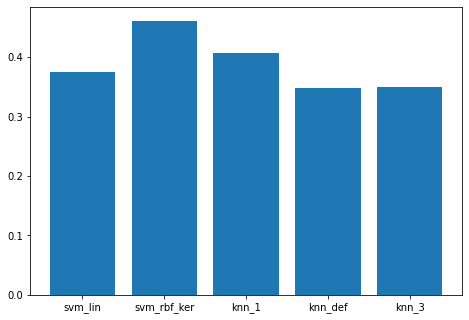

In [ ]:

svm_rbf_ker = 0.46140986347171914
knn_1 = 0.406241292839231
knn_def = 0.34800780161604905
knn_3 = 0.3496795764837002

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algorithm = ['svm_lin', 'svm_rbf_ker', 'knn_1', 'knn_def', 'knn_3']
accuracy = [svm_lin, svm_rbf_ker, knn_1, knn_def, knn_3]
ax.bar(algorithm, accuracy)
plt.show()